In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
# from matplotlib import pyplot as plt
# from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# import matplotlib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [2]:
data = pd.read_csv('./mushrooms.csv')
data.head()
# data.info()
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [3]:
# take a look at all of the unique values for each column
for col in data.columns:
    print(col, ": ", data[col].unique(),"num:", len(data[col].unique()))

# note: there are 2480 values of '?' in the stalk-root column
print(data['stalk-root'].value_counts())

# replace those '?' with NaN
data = data.replace('?', np.nan)

# check to make sure they were properly replaced
print(data['stalk-root'].value_counts())

class :  ['p' 'e'] num: 2
cap-shape :  ['x' 'b' 's' 'f' 'k' 'c'] num: 6
cap-surface :  ['s' 'y' 'f' 'g'] num: 4
cap-color :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'] num: 10
bruises :  ['t' 'f'] num: 2
odor :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm'] num: 9
gill-attachment :  ['f' 'a'] num: 2
gill-spacing :  ['c' 'w'] num: 2
gill-size :  ['n' 'b'] num: 2
gill-color :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o'] num: 12
stalk-shape :  ['e' 't'] num: 2
stalk-root :  ['e' 'c' 'b' 'r' '?'] num: 5
stalk-surface-above-ring :  ['s' 'f' 'k' 'y'] num: 4
stalk-surface-below-ring :  ['s' 'f' 'y' 'k'] num: 4
stalk-color-above-ring :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y'] num: 9
stalk-color-below-ring :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c'] num: 9
veil-type :  ['p'] num: 1
veil-color :  ['w' 'n' 'o' 'y'] num: 4
ring-number :  ['o' 't' 'n'] num: 3
ring-type :  ['p' 'e' 'l' 'f' 'n'] num: 5
spore-print-color :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b'] num: 9
population :  ['s' 'n' 'a' 'v' 'y' 'c'] n

In [4]:
data['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [5]:
print("shape: ", data.shape)

# encoding the data
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
    
data.head()

shape:  (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(8124, 23)
(8124, 23)


In [7]:
def training_perceptron(learning_rate, feature_vectors, label_vector, w):
    mistakes = 0
    t = 0
    for x_t in feature_vectors:        
        y_hat = np.sign(np.dot(x_t, w))
        y = label_vector[t]   
        if y * y_hat <= 0:
            mistakes += 1   
            if y == 1:
                w = np.add(w, learning_rate * 1 * x_t)   
            elif y == -1:
                w = np.subtract(w, learning_rate*x_t)   
            elif y == 0:
                w = np.subtract(w, learning_rate * x_t)   
            else:
                raise ValueError
        t += 1

    return w, mistakes

In [8]:
# splitting data into features and labels. Putting them into numpy format so sklearn can unserstand
X = data.drop(['class'],axis=1).to_numpy()
y = data['class'].to_numpy()

# seperating origional data for general use
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=10)

In [9]:
# feature pruning
w_avg = [0] * 22
w = [0] * 22
w, mistakes = training_perceptron(1, X_train, y_train,w)

# the weights with the highest |val| their index will be the features that are the most important
print(w)
data.head()

'''
    when i did this dropping my perceptron and decision tree whent down in quality
'''
# print out the least affecting weights with relation to origional raw data
# for i in range(len(w)):
#     if w[i] < 500 and w[i] > -500:
#         # add 1 because the training data drops the first dataframe
#         print(i + 1)
        
# df2 = data.drop(data.columns[[1,6,10,16,17,18]],axis = 1)
'''
    second attempt: this one drastically improved perceptron and had a small improvement on decision tree
'''
for i in range(len(w)):
    if w[i] < 200 and w[i] > -200:
        # add 1 because the training data drops the first dataframe
        print(i + 1)


[   -95    922  -1214  -1416  -1783    -45   -717   1311 -10990   -359
   1392  -1413  -1366  -2491  -2425      0   -136   -496  -4459   1677
   1386   1784]
1
6
16
17


perceptron:  0.7967176426706453
decision tree:  0.9541215964192465
KNN:  0.9985080193957478


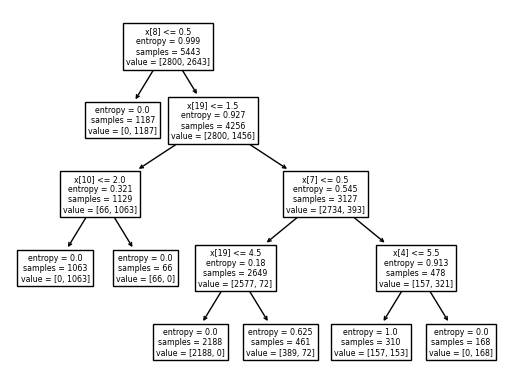

In [10]:
# training a perceptron classifier on unpruned data set
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
l = perceptron.predict(X_test)
print("perceptron: ", metrics.accuracy_score(y_test, l))

# training decision tree classifier on unpruned data set
dtc = DecisionTreeClassifier(max_depth=4, criterion="entropy")
dtc.fit(X_train,y_train)

l = dtc.predict(X_test)
print("decision tree: ", metrics.accuracy_score(y_test, l))

plot_tree(dtc)

# training knn classifier on unpruned data set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
l = knn.predict(X_test)
print("KNN: ", metrics.accuracy_score(y_test, l))


perceptron:  0.9324878776575904
decision tree:  0.9541215964192465
KNN:  0.9992540096978739


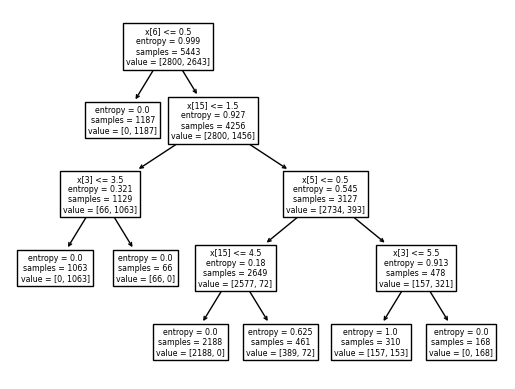

In [11]:
# creating new dataframe with pruned data and split data for model use
df2 = data.copy()
df2 = df2.drop(df2.columns[[1,6,16,17]],axis = 1)
df2.head()

X2 = df2.drop(['class'],axis=1).to_numpy()
y2 = data['class'].to_numpy()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33,random_state=10)



# training a perceptron classifier on pruned data
perceptron2 = Perceptron()
perceptron2.fit(X_train2, y_train2)
l = perceptron2.predict(X_test2)
print("perceptron: ", metrics.accuracy_score(y_test2, l))

# Initial decision tree, overfit due to not having a maxdepth
# we can see 
'''
    Initial decision tree. We can see that it is overfitting to the data to have 100% accuracy.
    We can see that if no max height is defined that the tree has a depth of 7.
    This will likely lead to poor generalization
'''
dtc = DecisionTreeClassifier(max_depth=4, criterion="entropy")
dtc.fit(X_train2,y_train2)

l = dtc.predict(X_test2)
print("decision tree: ", metrics.accuracy_score(y_test2, l))

plot_tree(dtc)

# training knn classifier on pruned data set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2,y_train2)

l = knn.predict(X_test2)
print("KNN: ", metrics.accuracy_score(y_test2, l))

1.0



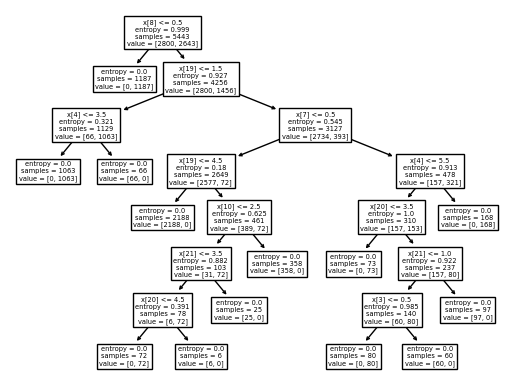

In [12]:
# Initial decision tree, overfit due to not having a maxdepth
# we can see 
'''
    Initial decision tree. We can see that it is overfitting to the data to have 100% accuracy.
    We can see that if no max height is defined that the tree has a depth of 7.
    This will likely lead to poor generalization
'''
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)

l = dtc.predict(X_test)
print(metrics.accuracy_score(y_test, l))

plot_tree(dtc)
print()

voting classifier:  0.9895561357702349
random forest classifier:  0.990302126072361



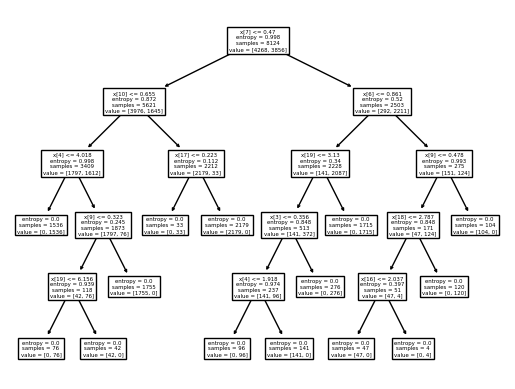

In [13]:


# classifier list for voting classifier
classifiers = []

n = len(y)

# bootstraping for voting classifier
for i in range(10):
    classifiers.append(DecisionTreeClassifier(max_depth=5, criterion="entropy",splitter="random"))

    samples = np.random.randint(n, size=n)
    X_train = X[samples] 
    y_train = y[samples]
    
    samples = np.random.randint(n, size=n//3)
    X_test = X[samples] 
    y_test = y[samples]
    
    
    classifiers[i].fit(X_train, y_train)
    l = classifiers[i].predict(X_test)
    # print(metrics.accuracy_score(y_test, l))

    
# input to ensamble classifier
estimators = []
for i in range(10):
    name = 'dt' + str(i)
    estimators.append((name, classifiers[i]))

# creating voting and random forest classifiers 
voting_classifier = VotingClassifier(estimators=estimators)
random_forest = RandomForestClassifier(max_depth=5, n_estimators=10)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=10)

# training voting classifer
voting_classifier.fit(X_train, y_train)
l = voting_classifier.predict(X_test)
print("voting classifier: ", metrics.accuracy_score(y_test, l))

# training random forest classifier
random_forest.fit(X_train, y_train)
l = random_forest.predict(X_test)
print("random forest classifier: ", metrics.accuracy_score(y_test, l))

# decision trees have high accuracy already .98
# even though random state the ensamble always came to 1.0 bc they are combining already high decision trees


# visualization for decision trees
plot_tree(classifiers[0])
print()